In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

In [42]:
result = pd.read_csv('Absenteeism_predictions.csv')

### Absenteeism probability against the age

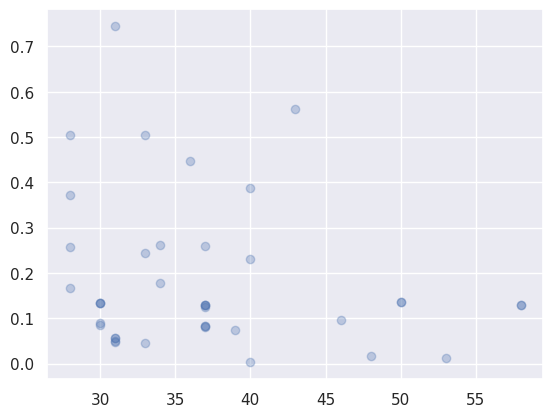

In [43]:
plt.scatter(result['Age'], result['Probability'], alpha=0.3)

In [44]:
avg_prob = result.groupby(['Age'])['Probability'].mean().reset_index()
avg_prob

,Age,Probability
0,28,0.325146
1,30,0.114961
2,31,0.191164
3,33,0.265078
4,34,0.219016
5,36,0.447142
6,37,0.127637
7,39,0.073378
8,40,0.206863
9,43,0.561561


Text(0, 0.5, 'Average Probability')

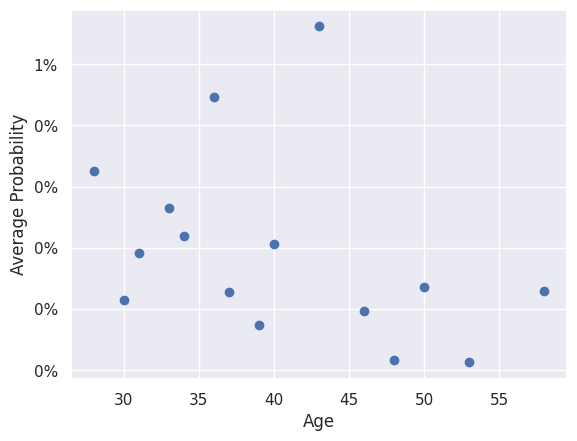

In [45]:
plot = plt.scatter(avg_prob['Age'], avg_prob['Probability'])
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
# plot.axes.yaxis.set_major_formatter(mtick.PercentFormatter())
plot.axes.yaxis.set_major_formatter(yticks)
plot.axes.set_xlabel('Age')
plot.axes.set_ylabel('Average Probability')

In [46]:
plt.axes

<function matplotlib.pyplot.axes(arg=None, **kwargs)>

### Absenteeism probability against the reasons

1. Reason 1: various diseases
2. Pregnancy and giving birth
3. Poisoning
4. Light diseases

In [47]:
result.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Children',
       'Pets', 'Probability', 'Prediction'], dtype=object)

In [48]:
all_reasons = result[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Probability']]


#### filtering only those who set the reason_x as their execuse for being absent

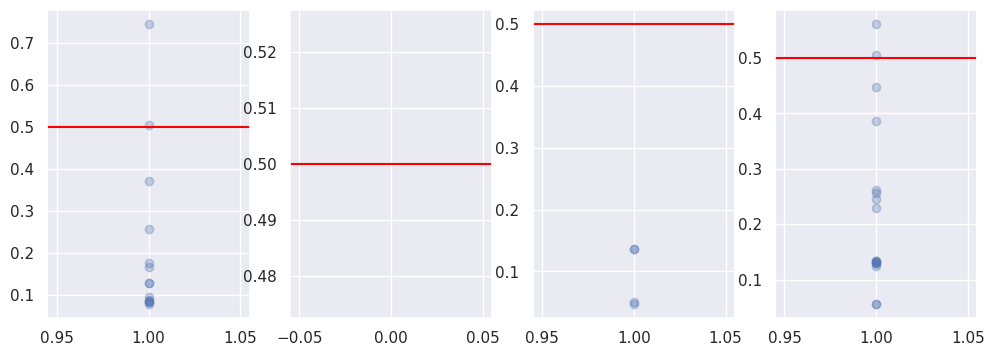

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
axs[0].scatter(result.loc[result['Reason_1']==1, 'Reason_1'], result.loc[result['Reason_1']==1, 'Probability'], alpha=0.3)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[1].scatter(result.loc[result['Reason_2']==1, 'Reason_2'], result.loc[result['Reason_2']==1, 'Probability'], alpha=0.3)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[2].scatter(result.loc[result['Reason_3']==1, 'Reason_3'], result.loc[result['Reason_3']==1, 'Probability'], alpha=0.3)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[3].scatter(result.loc[result['Reason_4']==1, 'Reason_4'], result.loc[result['Reason_4']==1, 'Probability'], alpha=0.3)
axs[3].axhline(y=0.5, color='red', linestyle='-')

#### Absenteeism vs Children

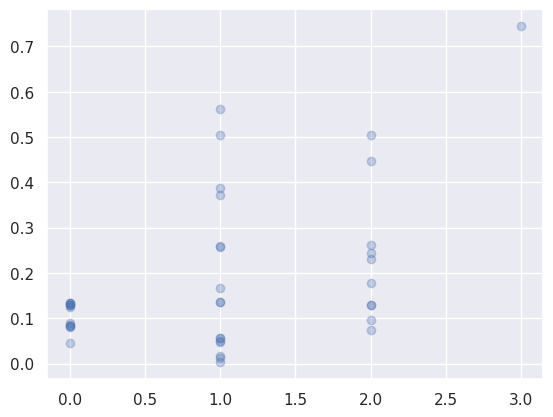

In [50]:
plt.scatter(result['Children'], result['Probability'], alpha=0.3)

In [51]:
child_avg_prob = result.groupby(['Children'])['Probability'].mean().reset_index()
child_avg_prob

,Children,Probability
0,0,0.106342
1,1,0.189101
2,2,0.229322
3,3,0.745076


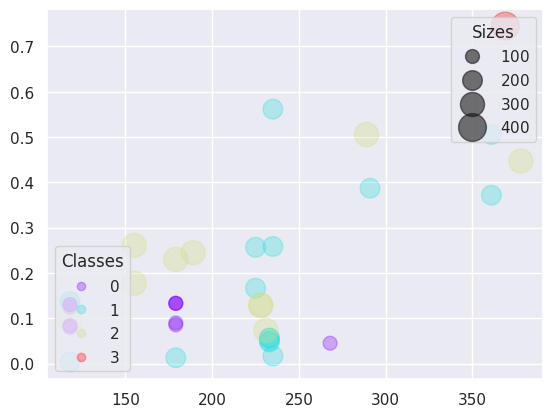

In [52]:
fig, ax = plt.subplots()
scatter = ax.scatter(result['Transportation Expense'], result['Probability'], 
                     c=result['Children'], cmap='rainbow', 
                     s=(result['Children']+1)*100, alpha=0.3)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
fig.show()

In [70]:
transport_avg_prob = result.groupby(['Transportation Expense'])['Probability'].mean().reset_index()
transport_avg_prob

203.525

In [53]:
import plotly.express as px
# result['Children'] = result['Children'].astype('category')
# result['Children'] = result['Children'].cat.as_ordered()

scatter_fig = px.scatter(result, x = 'Transportation Expense', y = 'Probability', 
                     color='Children', size='Children',
                     hover_name='Children')
scatter_fig.show()

In [77]:
import plotly.graph_objects as go

size = result['Children']
fig = go.Figure(data=[go.Scatter(
    x=result['Transportation Expense'], y=result['Probability'],
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    )
)])
fig.show()